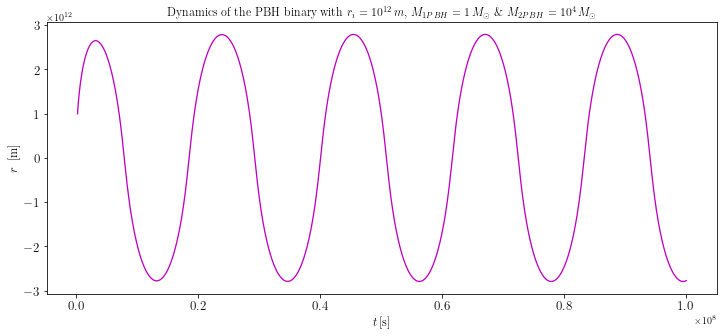

In [1]:
# Reference research paper "The merger rate of primordial-black-hole binaries".

# Dynamics of the PBH binaries with PBHs of masses, M_1PBH & M_2PBH at an initial separation of r_i=1e12m
# M_1PBH = 1 M☉ &  M_2PBH = 100 M☉.
# This binary is not having DM halos around the PBHs.


%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import rcParams
from module import *
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})
 


M_1PBH = 1*M_solar      # in units of M☉. 
M_2PBH = 1e4*M_solar    # in units of M☉.


def f(u,t):    #Eq.(4) in "PBH-binary" notes.
    return [u[1], (((-G*(M_1PBH+M_2PBH)*u[0])/((u[0]**2+b**2)**(3/2))) - (u[0]/(4*t**2)))]
                    
b= 1e12
r0= [1e12,2.12044e6]
ts= np.linspace(2.358e5,1e8,2000)
us= odeint(f,r0,ts)
rs= us[:,0]

plt.figure(figsize=(12,5))
plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.plot(ts,rs,'m')
plt.xlabel('$t \, $[s]',fontsize=12.5)
plt.ylabel('$r \, $ [m]',fontsize=12.5)


plt.title('Dynamics of the PBH binary with $r_{i}=10^{12}\,m$, $M_{1PBH} = 1\, M_{\odot}$ \& $M_{2PBH} = 10^{4}\, M_{\odot}$')
plt.show()

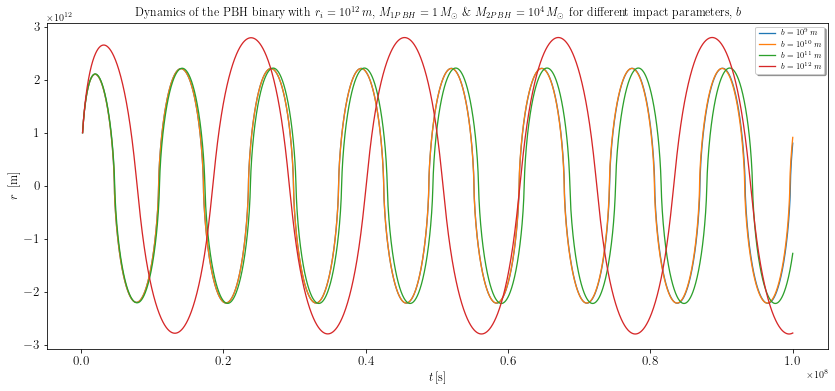

In [2]:
# Solution of eq.(4) in "PBH-binary"-notes, for different impact parameters, b and r_i=1e12m initial 
# separation between the PBHs in the binary (without DM halos).
 
plt.figure(figsize=(14,6))

M_1PBH = 1*M_solar      # in units of M☉. 
M_2PBH = 1e4*M_solar    # in units of M☉.




b=1e9
while b<1e13:
    def f(u,w):   #Eq.(4) in "PBH-binary" notes.
        return [u[1], (((-G*(M_1PBH+M_2PBH)*u[0])/((u[0]**2+b**2)**(3/2))) - (u[0]/(4*w**2)))]
    r0= [1e12,2.12044e6]
    ws= np.linspace(2.358e5,1e8,3000)
    us= odeint(f,r0,ws)
    rs= us[:,0]
    plt.plot(ws,rs,'')
    b*=10

    

plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.xlabel('$t \, $[s]',fontsize=12.5)
plt.ylabel('$r \, $ [m]',fontsize=12.5)
    
    
    
plt.title('Dynamics of the PBH binary with $r_{i}=10^{12}\, m$, $M_{1PBH} = 1\, M_{\odot}$ \& $M_{2PBH} = 10^{4}\, M_{\odot}$ for different impact parameters, $b$')
plt.legend(["$b=10^{9}\,m$","$b=10^{10}\,m$","$b=10^{11}\,m$","$b=10^{12}\,m$"],prop = {'size':8}, facecolor = 'white',loc='upper right', shadow = True,fontsize=33) 
plt.show()

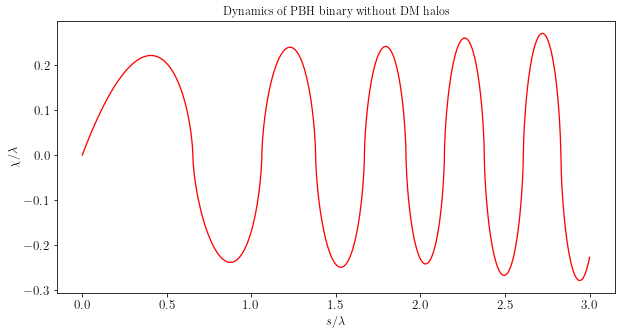

In [3]:
# Reference research paper "The merger rate of primordial-black-hole binaries".

# Dynamics of the PBH binaries in terms of the dimensionless coordinate, χ=(r/x) for λ=1 using 
# impact parameter, b=10^{-6}.
# λ=(8πρ_eqx^3)/3(M_1PBH+M_2PBH).



    

def f(u,s):    #Eq.(16) in "PBH-binary" notes.
    return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
            *((u[0]**2+b**2)**(3/2))))] 
                                       
    
λ_0=1
b=1e-6
separation0= [1e-12,1]
ss= np.linspace(1e-12,3,1000000) 
us= odeint(f,separation0,ss)
separations= us[:,0]
As=ss/λ_0
Bs=separations/λ_0


plt.figure(figsize=(10,5))
plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.plot(As,Bs,'r')
plt.xlabel('$s/\lambda$',fontsize=12.5)
plt.ylabel('$\chi/\lambda$',fontsize=12.5)
plt.title('Dynamics of PBH binary without DM halos')
plt.show()

b= 1.0e-06 χ/λ_0= 0.261
b= 1.0e-05 χ/λ_0= 0.236
b= 1.0e-04 χ/λ_0= 0.235
b= 1.0e-03 χ/λ_0= 0.243
b= 1.0e-02 χ/λ_0= 0.292


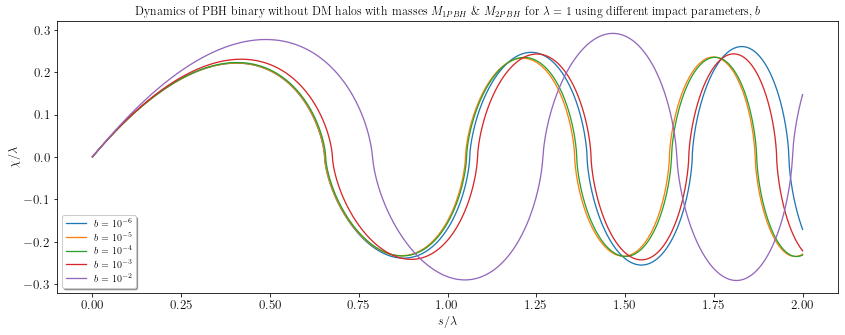

In [4]:
# Dynamics of the PBH binaries in terms of the dimensionless coordinate, χ=(r/x) for λ=1 using different 
# impact parameters.

# λ=(8πρ_eqx^3)/3(M_1PBH+M_2PBH).

fig = plt.figure(figsize=(14, 5))

b=1e-6    
while b<1e-1:
    def f(u,s):   # Eq.(16) in "PBH-binary" notes.
        return [u[1], -((s*g(s)+ h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*
                                                            λ_0*((u[0]**2+b**2)**(3/2))))]
    λ_0=1
    separation0= [1e-10,1]
    ss= np.linspace(1e-10,2,1000000) 
    us= odeint(f,separation0,ss)
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    Bs_max=np.max(Bs)
    print("b=",'%.1e'%b,"χ/λ_0=",'%.3f'%Bs_max)
    plt.plot(As,Bs,'')
    b*=10


plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


plt.xlabel('$s/\lambda$',fontsize=12.5)
plt.ylabel('$\chi/\lambda$',fontsize=12.5)
    
plt.title('Dynamics of PBH binary without DM halos with masses $M_{1PBH}$ \& $M_{2PBH}$ for $\lambda=1$ using different impact parameters, $b$')
plt.legend(["$b=10^{-6}\,$","$b=10^{-5}\,$","$b=10^{-4}\,$","$b=10^{-3}\,$","$b=10^{-2}\,$"],
           prop = {'size':10}, facecolor = 'white',loc='lower left', shadow = True,fontsize=39) 



plt.show()


# The graph clearly shows that, to solve the PBH binary equation in terms of the dimensionless coordinates,
# χ:- the adequate choice of impact parameter, b for λ=1 is b=10^{-4}.

b= 1.0e-07 χ/λ_0= 0.208
b= 1.0e-06 χ/λ_0= 0.208
b= 1.0e-05 χ/λ_0= 0.215
b= 1.0e-04 χ/λ_0= 0.254
b= 1.0e-03 χ/λ_0= 0.452


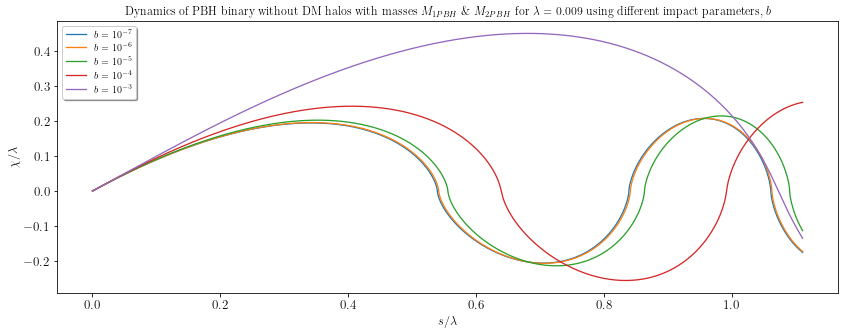

In [5]:
# Eq.(6) in "The merger rate of primordial-black-hole binaries" and eq.(16) in "PBH-binary" notes.

# Dynamics of the PBH binaries in terms of the dimensionless coordinate, χ=(r/x) for different 
# impact parameters,b.


# Solution of the equation of the PBH binary in terms of the dimensionless coordinate, χ=(r/x) for λ<<1 i.e. λ=0.009(say) which correspods to 
# in the radiation domination era.

# λ=(8πρ_eqx^3)/3(M_1PBH+M_2PBH).

fig = plt.figure(figsize=(14, 5))

b = 1e-7    
while b<1e-2:
    def f(u,s):        #Eq.(16) in "PBH-binary" notes.
        return [u[1], -((s*g(s) + h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*
                                                            λ_0*((u[0]**2+b**2)**(3/2))))]
    λ_0=0.009
    separation0= [1e-12,1]
    ss= np.linspace(1e-12,1e-2,6000) 
    us= odeint(f,separation0,ss)
    separations= us[:,0]
    As = ss/λ_0
    Bs = separations/λ_0
    Bs_max = np.max(Bs)
    print("b=",'%.1e'%b,"χ/λ_0=",'%.3f'%Bs_max)
    plt.plot(As,Bs,'')
    b*=10


plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


plt.xlabel('$s/\lambda$',fontsize=12.5)
plt.ylabel('$\chi/\lambda$',fontsize=12.5)
    
plt.title('Dynamics of PBH binary without DM halos with masses $M_{1PBH}$ \& $M_{2PBH}$ for $\lambda=0.009$ using different impact parameters, $b$')
plt.legend(["$b=10^{-7}\,$","$b=10^{-6}\,$","$b=10^{-5}\,$","$b=10^{-4}\,$","$b=10^{-3}\,$"],
           prop = {'size':10}, facecolor = 'white',loc='upper left', shadow = True,fontsize=39) 



plt.show()


#The graph clearly shows that, to solve the PBH binary equation in terms of the dimensionless coordinates, χ:- the adequate choice 
#of impact parameter, b for λ<<1 i.e. λ=0.009  is b=10^{-6}.

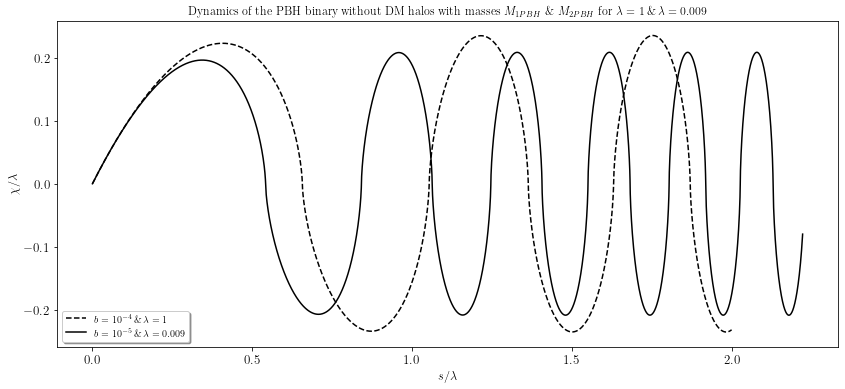

In [6]:
# Reproducing FIG. 1  of Reference paper "The merger rate of primordial-black-hole binaries".


#Eq.(16) in "PBH-binary" notes for λ=1.
def f(u,s):         
        return [u[1], -((s*g(s) + h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*
                                                            λ_0*((u[0]**2+b**2)**(3/2))))]
                      
λ_0=1
b=1e-4
separation0= [1e-10,1]
ss= np.linspace(1e-10,2,10000) 
us= odeint(f,separation0,ss)
separations= us[:,0]
As=ss/λ_0
Bs=separations/λ_0



#Eq.(16) in "PBH-binary" notes for λ<<1 i.e. λ=0.009(say) which corresponds to the radiation domination era.
def j(n,p):
    return [n[1], -((p*g(p)+h(p))*((p*n[1]-n[0]))/(h(p)*p**2))-((n[0])/((((h(p)*p)**2))*
                                                            λ_00*((n[0]**2+c**2)**(3/2))))]
                   
z0= [1e-12,1]
λ_00=0.009
c=1e-6
ps= np.linspace(1e-12,2e-2,6000) 
ns= odeint(j,z0,ps)
zs= ns[:,0]
Ps=ps/λ_00
Zs=zs/λ_00

plt.figure(figsize=(14, 6))
plt.rc('lines', linewidth=1.5)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


plt.plot(As,Bs,'k--')
plt.plot(Ps,Zs,'k')
plt.xlabel('$s/\lambda$',fontsize=12.5)
plt.ylabel('$\chi/\lambda$',fontsize=12.5)
plt.legend(["$b=10^{-4}\, \& \, \lambda=1 $","$b=10^{-5}\, \& \, \lambda=0.009$"],
           prop = {'size':10}, facecolor = 'white',loc='lower left', shadow = True,fontsize=39)                                                                                            
plt.title('Dynamics of the PBH binary without DM halos with masses $M_{1PBH}$ \& $M_{2PBH}$ for $\lambda=1 \, \&  \, \lambda=0.009$') 


plt.savefig("PBH binary without DM halos.pdf")
plt.show()


# The graph shows that, in the limit λ<<1, the PBH pair effectively decouples from the Hubble expansion 
# deep in the radiation-domination era corresponding to s<<1. In this case, the  binary effectively 
# decouples from the Hubble flow at s ≈ λ/3.


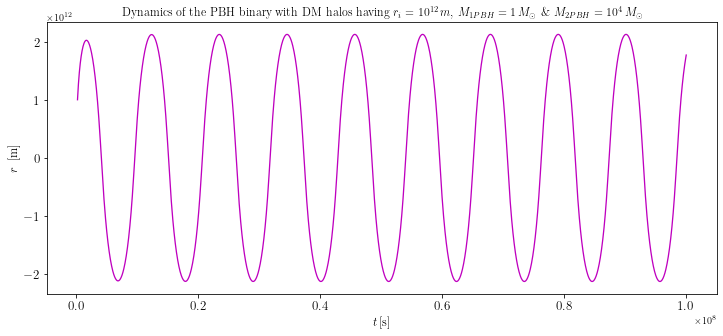

In [7]:
# Dynamics of the PBH binaries with PBHs of masses, M_1PBH & M_2PBH at an initial separation of r_i=1e12m,
# M_1PBH = 1 M☉ &  M_2PBH = 100 M☉ having DM halos of sizes equal to their own.

# Using impact parameter, b=10^{12}.

M_1PBH=1*M_solar      # in units of M☉. 
M_2PBH=1e4*M_solar    # in units of M☉.

M_1halo=1*M_solar      # in units of M☉. 
M_2halo=1e4*M_solar    # in units of M☉.

def f(u,t):   #Eq.(33) in "PBH-binary" notes.
    return [u[1], (((-G*(M_1PBH+M_2PBH+M_1halo+M_2halo)*u[0])/((u[0]**2+b**2)**(3/2))) - (u[0]/(4*t**2)))]
                    
b= 1e12
r0= [1e12,2.12044e6]
ts= np.linspace(2.358e5,1e8,2000)
us= odeint(f,r0,ts)
rs= us[:,0]

plt.figure(figsize=(12,5))
plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.plot(ts,rs,'m')
plt.xlabel('$t \, $[s]',fontsize=12.5)
plt.ylabel('$r \, $ [m]',fontsize=12.5)


plt.title('Dynamics of the PBH binary with DM halos having $r_{i}=10^{12}\,m$, $M_{1PBH} = 1\, M_{\odot}$ \& $M_{2PBH} = 10^{4}\, M_{\odot}$')
plt.show()

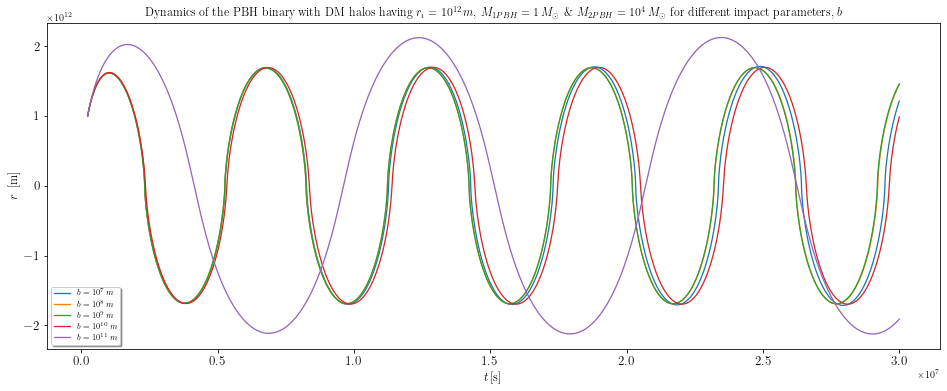

In [8]:
# Dynamics of the PBH binaries in proper coordinates with PBHs of masses, M_1PBH & M_2PBH at 
# an initial separation of r_i=1e12m, M_1PBH = 1 M☉ &  M_2PBH = 100 M☉ having 
# DM halos of sizes equal to their own.
 
# Using different impact parameters, b.
    
    
plt.figure(figsize=(16,6))

M_1PBH=1*M_solar      # in units of M☉. 
M_2PBH=1e4*M_solar    # in units of M☉.

M_1halo=1*M_solar      # in units of M☉. 
M_2halo=1e4*M_solar    # in units of M☉.


b=1e8
while b<1e13:
    def f(u,w):   #Eq.(33) in "PBH-binary" notes.
        return [u[1], (((-G*(M_1PBH+M_2PBH+M_1halo+M_2halo)*u[0])/((u[0]**2+b**2)**(3/2))) - (u[0]/(4*w**2)))]
    r0= [1e12,2.12044e6]
    ws= np.linspace(2.358e5,3e7,3000)
    us= odeint(f,r0,ws)
    rs= us[:,0]
    plt.plot(ws,rs,'')
    b*=10

    

plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.xlabel('$t \, $[s]',fontsize=12.5)
plt.ylabel('$r \, $ [m]',fontsize=12.5)
    
    
    
plt.title('Dynamics of the PBH binary with DM halos having $r_{i}=10^{12}\,m$, $M_{1PBH} = 1\, M_{\odot}$ \& $M_{2PBH} = 10^{4}\, M_{\odot}$ for different impact parameters, $b$')
plt.legend(["$b=10^{7}\,m$","$b=10^{8}\,m$","$b=10^{9}\,m$","$b=10^{10}\,m$","$b=10^{11}\,m$","$b=10^{12}\,m$"],prop = {'size':8}, facecolor = 'white',loc='lower left', shadow = True,fontsize=33) 

plt.show()

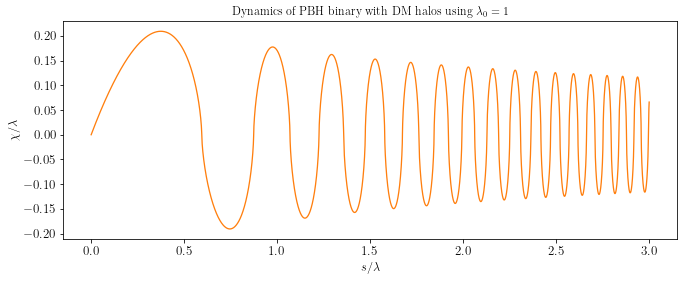

In [9]:
# Dynamics of the PBH binaries in dimensionless coordinates, χ with PBHs of masses, M_1PBH & M_2PBH at 
# an initial separation of r_i=1e12m, M_1PBH = 1 M☉ &  M_2PBH = 100 M☉ having 
# DM halos of sizes equal to their own.
 


plt.figure(figsize=(11,4)) 

                  
λ_0=1       # λ_0=(8πρ_eqx^3)/3(M_1PBH+M_2PBH). 


def f(u,s,λ_0): #Eq.(37) in "PBH-binary" notes.
    return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(λ_0,s)
                     *((u[0]**2+b**2)**(3/2))))]   
separation0= [1e-12,1]
b= (3*λ_0)/100000
ss= np.linspace(1e-12,((9*λ_0)/3),100000) 
us= odeint(f,separation0,ss,args=( λ_0,))
separations= us[:,0]
As=ss/λ_0
Bs=separations/λ_0
plt.plot(As,Bs,'C1')
    

plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


plt.xlabel('$s/\lambda$',fontsize=12.5)
plt.ylabel('$\chi/\lambda$',fontsize=12.5)
    
plt.title('Dynamics of PBH binary with DM halos using $\lambda_{0}=1$')

plt.show()

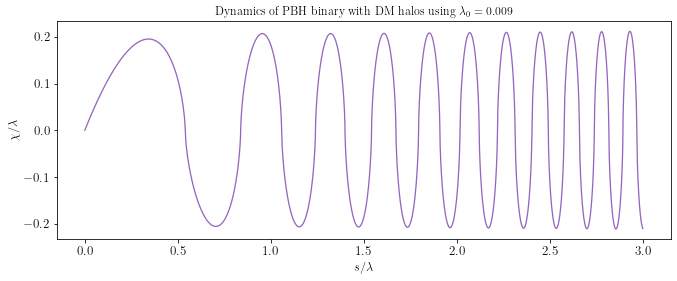

In [10]:
# Dynamics of the PBH binaries in dimensionless coordinates, χ with PBHs of masses, M_1PBH & M_2PBH at 
# an initial separation of r_i=1e12m, M_1PBH = 1 M☉ &  M_2PBH = 100 M☉ having 
# DM halos of sizes equal to their own.




plt.figure(figsize=(11,4)) 

λ_0=0.009                # λ_0=(8πρ_eqx^3)/3(M_1PBH+M_2PBH).
def f(u,s,λ_0): #Eq.(37) in "PBH-binary" notes.
    return [u[1], -((s*g(s)+ h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(λ_0,s)
                     *((u[0]**2+b**2)**(3/2))))]    
separation0= [1e-12,1]
b= (3*λ_0)/100000
ss= np.linspace(1e-12,((9*λ_0)/3),100000) 
us= odeint(f,separation0,ss,args=( λ_0,))
separations= us[:,0]
As=ss/λ_0
Bs=separations/λ_0
plt.plot(As,Bs,'C4')
    

plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


plt.xlabel('$s/\lambda$',fontsize=12.5)
plt.ylabel('$\chi/\lambda$',fontsize=12.5)
    
plt.title('Dynamics of PBH binary with DM halos using $\lambda_{0}=0.009$')

plt.show()

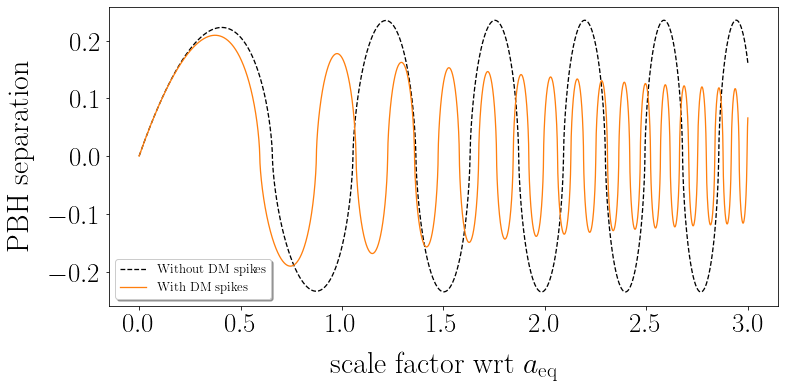

In [11]:
# Comparison of the dynamics of the PBH binary without DM halos with that of the PBH binary with DM halos 
# in terms of the dimensionless coordinates, χ for λ_0=λ=1.

# Here, λ_0=λ=(8πρ_eqx^3)/3(M_1PBH+M_2PBH).

plt.figure(figsize=(12, 5.5)) 


#PBH binaries without DM halos.
def j(n,p):  #Eq.(16) in "PBH-binary" notes.
    return [n[1], -((p*g(p)+ h(p))*((p*n[1]-n[0]))/(h(p)*p**2))-((n[0])/((((h(p)*p)**2))*
                                                            λ_0*((n[0]**2+c**2)**(3/2))))]
                   
z0= [1e-12,1]
λ_0=1
c=1e-4
ps= np.linspace(1e-12,3,100000) 
ns= odeint(j,z0,ps)
zs= ns[:,0]
Ps=ps/λ_0
Zs=zs/λ_0   
plt.plot(Ps,Zs,'k--')   
    
    

#PBH binaries with DM halos.   

def f(u,s,λ_0): #Eq.(37) in "PBH-binary" notes.
    return [u[1], -((s*g(s)+ h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(λ_0,s)
                     *((u[0]**2+b**2)**(3/2))))]    
separation0= [1e-12,1]
λ_0=1 
b= (3*λ_0)/100000
ss= np.linspace(1e-12,((9*λ_0)/3),100000) 
us= odeint(f,separation0,ss,args=( λ_0,))
separations= us[:,0]
As=ss/λ_0
Bs=separations/λ_0
plt.plot(As,Bs,'C1')

    

plt.rc('lines', linewidth= 1.5)
plt.xticks(fontsize= 27)
plt.yticks(fontsize= 27)


plt.xlabel('scale factor wrt $a_\mathrm{{eq}}$',   fontsize= 30, labelpad = 15)
plt.ylabel('PBH separation',   fontsize=30, labelpad = 15)
    

plt.legend(["Without DM spikes","With DM spikes"],prop = {'size': 13}, facecolor = 'white',
           loc='lower left', shadow = True, fontsize=100) 
#plt.title("$\chi = r_\mathrm{b}/x, \, s = a/a_\mathrm{eq}$", fontsize = 30, pad = 16)
plt.savefig("PBH binaries.png", bbox_inches = 'tight')
plt.show()

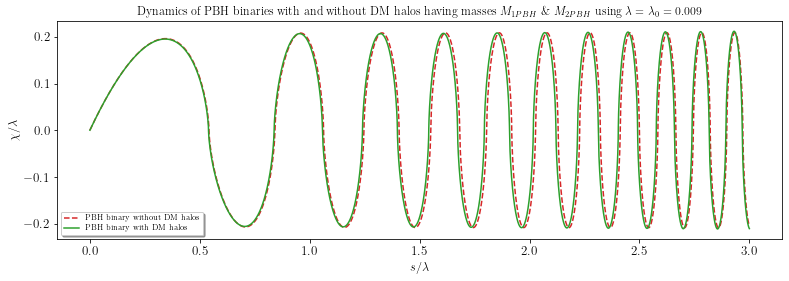

In [12]:
#Comparison of the dynamics of the PBH binary without DM halos with that of the PBH binary with DM halos 
# in terms of the dimensionless coordinates, χ for λ_0=λ=0.009<<1(corresponding to the radiation dominated 
# era).

# Here, λ_0=λ=(8πρ_eqx^3)/3(M_1PBH+M_2PBH).

plt.figure(figsize=(13,4)) 


#PBH binaries without DM halos.    
def j(n,p):  #Eq.(16) in "PBH-binary" notes.
    return [n[1], -((p*g(p)+ h(p))*((p*n[1]-n[0]))/(h(p)*p**2))-((n[0])/((((h(p)*p)**2))*
                                                            λ_0*((n[0]**2+c**2)**(3/2))))]
                     
z0= [1e-12,1]
λ_0=0.009
c=1e-6
ps= np.linspace(1e-12,2.7e-2,100000) 
ns= odeint(j,z0,ps)
zs= ns[:,0]
Ps=ps/λ_0
Zs=zs/λ_0  
plt.plot(Ps,Zs,'C3--')   
    


                   

#PBH binaries with DM halos.        

   
def f(u,s,λ_0): #Eq.(37) in "PBH-binary" notes.
    return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(λ_0,s)
                     *((u[0]**2+b**2)**(3/2))))]    
separation0= [1e-12,1]
λ_0=0.009
b= (3*λ_0)/100000
ss= np.linspace(1e-12,((9*λ_0)/3),100000) 
us= odeint(f,separation0,ss,args=( λ_0,))
separations= us[:,0]
As=ss/λ_0
Bs=separations/λ_0
plt.plot(As,Bs,'C2')
    


    
plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


plt.xlabel('$s/\lambda$',fontsize=12.5)
plt.ylabel('$\chi/\lambda$',fontsize=12.5)
    
plt.title('Dynamics of PBH binaries with and without DM halos having masses $M_{1PBH}$ \& $M_{2PBH}$ using $\lambda=\lambda_{0}=0.009$')
plt.legend(["PBH binary without DM halos","PBH binary with DM halos"],prop = {'size':7.5}, facecolor = 'white',
           loc='lower left', shadow = True,fontsize=33) 

plt.show()

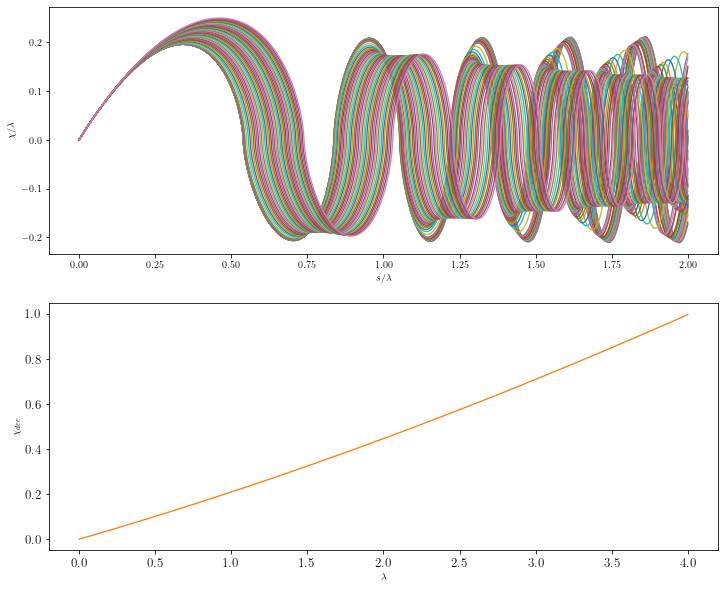

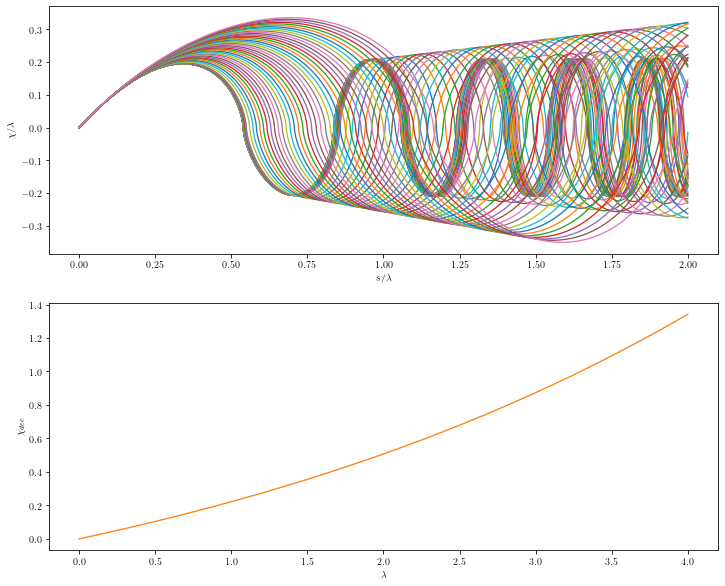

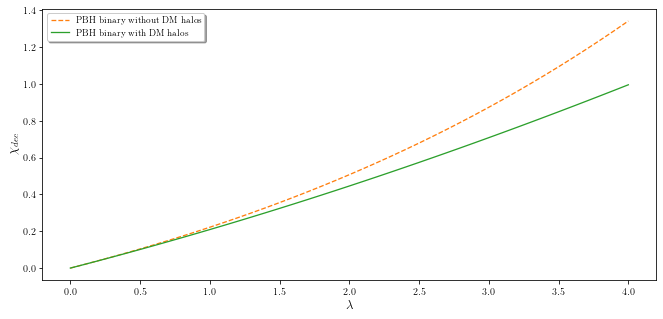

In [13]:
# Comparison of the χ_dec-values of the PBH binary decouple from Hubble Expansion with and 
#without DM halos using different values of λ.

fig, ax = plt.subplots(2,figsize=(12, 10))    
plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)



#PBH binaries with DM halos.

def χ_dec_halo(λ_0):    # Function to calculate χ_dec of the PBH binary decouple from Hubble Expansion.
    def f(u,s,λ_0): #Eq.(37) in "PBH-binary" notes.
        return [u[1], -((s*g(s)+ h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(λ_0,s)
                     *((u[0]**2+b**2)**(3/2))))]     
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),100000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    ax[0].plot(As,Bs,'')
    ax[0].set(xlabel="$s/\lambda$", ylabel="$\chi/\lambda$")
    λ_0+=0.0001
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        χ=(Bs[i-1]*λ_0)             # As Bs=χ/λ_0.
        if Δ<0:
            break
        
    return χ


χ_dec_halo_list = np.zeros(len(λ_list))
for i, λ_0 in enumerate(λ_list):
     χ_dec_halo_list[i] = χ_dec_halo(λ_0)


ax[1].plot(λ_list,χ_dec_halo_list,'C1')
ax[1].set(xlabel="$\lambda$", ylabel="$\chi_{dec}$")





#PBH binaries without DM halos.
fig, ax = plt.subplots(2,figsize=(12, 10))

def χ_dec(λ_0):      #Function to calculate χ_dec of the PBH binary decouple from Hubble Expansion. 
    def f(u,s,λ_0):  #Eq.(16) in "PBH-binary" notes.
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0*((u[0]**2+b**2)**(3/2))))]   
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),100000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    ax[0].plot(As,Bs,'')
    ax[0].set(xlabel="$s/\lambda$", ylabel="$\chi/\lambda$")
    λ_0+=0.0001
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        χ=(Bs[i-1]*λ_0)             # As Bs=χ/λ_0.
        if Δ<0:
            break
        
    return χ



χ_dec_list = np.zeros(len(λ_list))
for i, λ_0 in enumerate(λ_list):
     χ_dec_list[i] = χ_dec(λ_0)


ax[1].plot(λ_list,χ_dec_list,'C1')
ax[1].set(xlabel="$\lambda$", ylabel="$\chi_{dec}$")


plt.figure(figsize=(11,5))
plt.plot(λ_list, χ_dec_list,'C1--')
plt.plot(λ_list, χ_dec_halo_list,'C2')
plt.xlabel("$\lambda$",fontsize=13)
plt.ylabel("$\chi_{dec}$",fontsize=13)


plt.legend(["PBH binary without DM halos","PBH binary with DM halos"],prop = {'size':9}, facecolor = 'white',
           loc='upper left', shadow = True,fontsize=33) 
plt.savefig("χ_dec vs λ.pdf")
plt.show()


#The last graph shows that for λ<<1 which correspond to the radiation dominated era, 
#the behaviour of a PBH binary  having DM halos being accreted around the PBHs is not 
#significantly different from the same binary having no DM halos. But for  λ≈1 or λ>1, the size of the 
# binary orbits with DM halos is comparatively smaller.

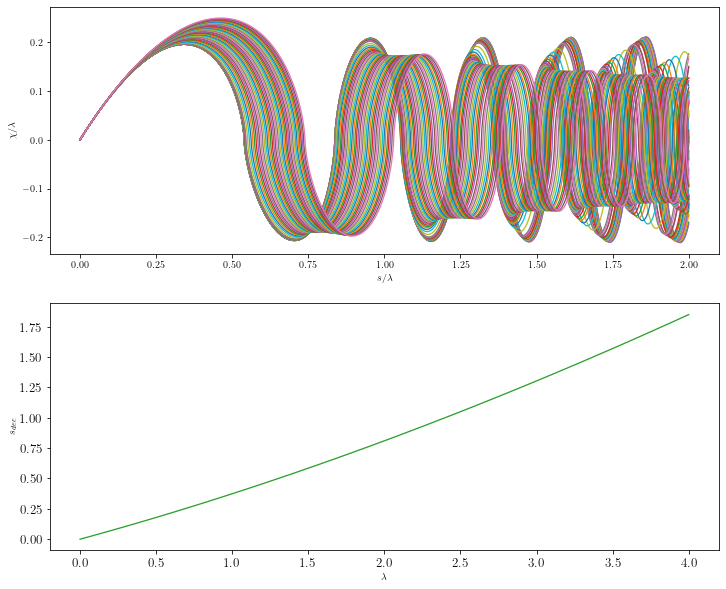

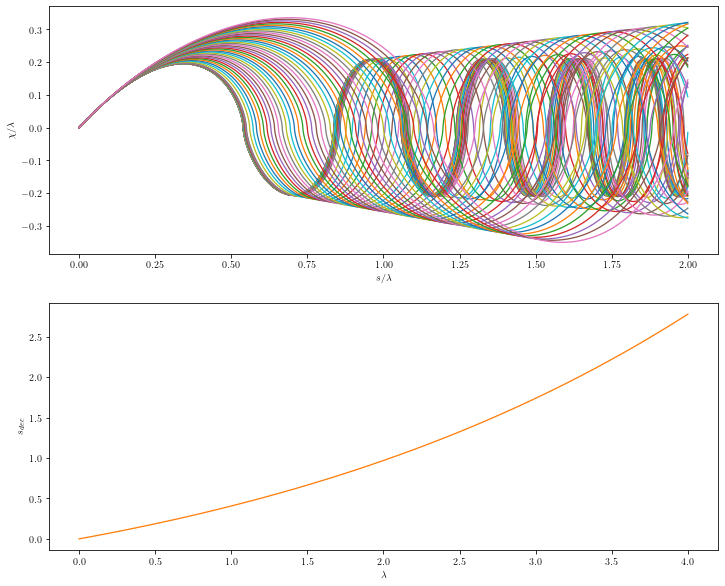

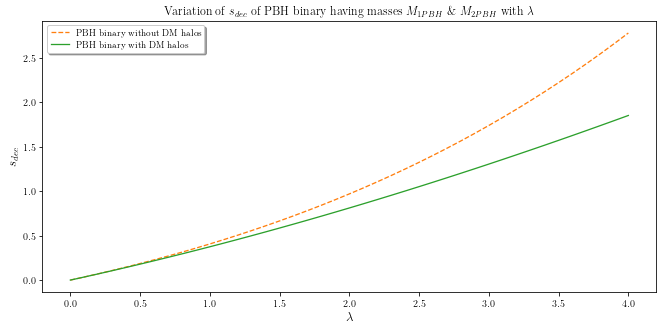

In [14]:
# Comparison of the s_dec-values of the PBH binary decouple from Hubble Expansion with and 
#without DM halos using different values of λ.




fig, ax = plt.subplots(2,figsize=(12, 10))    
plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)



#PBH binaries with DM halos.


def s_dec_halo(λ_0):   #Function to calculate the scale-factor of the PBH binary decouple from Hubble flow.
    def f(u,s,λ_0): #Eq.(37) in "PBH-binary" notes.
        return [u[1], -((s*g(s)+ h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(λ_0,s)
                     *((u[0]**2+b**2)**(3/2))))]     
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),100000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    ax[0].plot(As,Bs,'')
    ax[0].set(xlabel="$s/\lambda$", ylabel="$\chi/\lambda$")
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        s=(As[i]*λ_0)             # As ss=s/λ_0.
        if Δ<0:
            break
        
    return s



s_dec_halo_list = np.zeros(len(λ_list))
for i, λ_0 in enumerate(λ_list):
     s_dec_halo_list[i] = s_dec_halo(λ_0)


ax[1].plot(λ_list,s_dec_halo_list,'C2')
ax[1].set(xlabel="$\lambda$", ylabel="$s_{dec}$")





#PBH binaries without DM halos.
fig, ax = plt.subplots(2,figsize=(12, 10))

def s_dec(λ_0):       #Function to calculate the scale-factor of the PBH binary decouple from Hubble flow.
    def f(u,s,λ_0):   #Eq.(37) in "PBH-binary" notes.
            return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]   
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),100000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    ax[0].plot(As,Bs,'')
    ax[0].set(xlabel="$s/\lambda$", ylabel="$\chi/\lambda$")
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        s=(As[i]*λ_0)             # As ss=s/λ_0.
        if Δ<0:
            break
        
    return s



s_dec_list = np.zeros(len(λ_list))
for i, λ_0 in enumerate(λ_list):
     s_dec_list[i] = s_dec(λ_0)


ax[1].plot(λ_list,s_dec_list,'C1')
ax[1].set(xlabel="$\lambda$", ylabel="$s_{dec}$")


plt.figure(figsize=(11,5))
plt.plot(λ_list,s_dec_list,'C1--')
plt.plot(λ_list,s_dec_halo_list,'C2')
plt.xlabel("$\lambda$",fontsize=13)
plt.ylabel("$s_{dec}$",fontsize=13)

plt.title('Variation of $s_{dec}$ of PBH binary having masses $M_{1PBH}$ \& $M_{2PBH}$ with $\lambda$ ')
plt.legend(["PBH binary without DM halos","PBH binary with DM halos"],prop = {'size':9}, facecolor = 'white',
           loc='upper left', shadow = True,fontsize=33) 
plt.savefig("s_dec vs λ.pdf")
plt.show()

# This graph also shows that for λ≈1 or λ>1, PBH binary having DM halos decouples earlier 
# than the  same binary with no DM halos and hence is smaller in size comparatively.

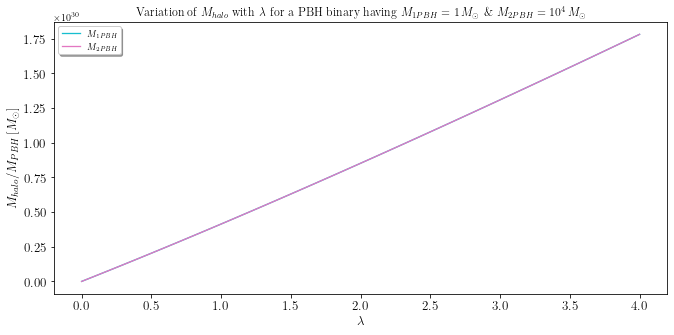

In [15]:
# Estimate of the mass of the DM halos in the PBH binary at the point of 
# decoupling, s_dec for PBH binary.

M_1PBH = 1*M_solar         # in units of M☉. 
M_2PBH = 1e4*M_solar       # in units of M☉.


M_1halo_list = np.zeros(len(λ_list))
for i, s in enumerate(s_dec_halo_list):
     M_1halo_list[i] = M_halo(M_1PBH,s)


M_2halo_list = np.zeros(len(λ_list))
for i, s in enumerate(s_dec_halo_list):
     M_2halo_list[i] = M_halo(M_2PBH,s)
        

plt.figure(figsize=(11,5))
plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
        

plt.plot(λ_list,(M_2halo_list*1e-4),'C9')    
plt.plot(λ_list,(M_1halo_list),'C6')



plt.xlabel("$\lambda$",fontsize=13)
plt.ylabel("$M_{halo}/M_{PBH} \, [M_{\odot}]$",fontsize=13)

plt.title('Variation of $M_{halo}$ with $\lambda$ for a PBH binary having $M_{1PBH} = 1\, M_{\odot}$ \& $M_{2PBH} = 10^{4}\, M_{\odot}$')
plt.legend(["$M_{1PBH}$","$M_{2PBH}$"],prop = {'size':9}, facecolor = 'white',
           loc='upper left', shadow = True,fontsize=33) 

plt.show()

[Text(0.5, 0, '$\\lambda$'), Text(0, 0.5, '$a/x$')]

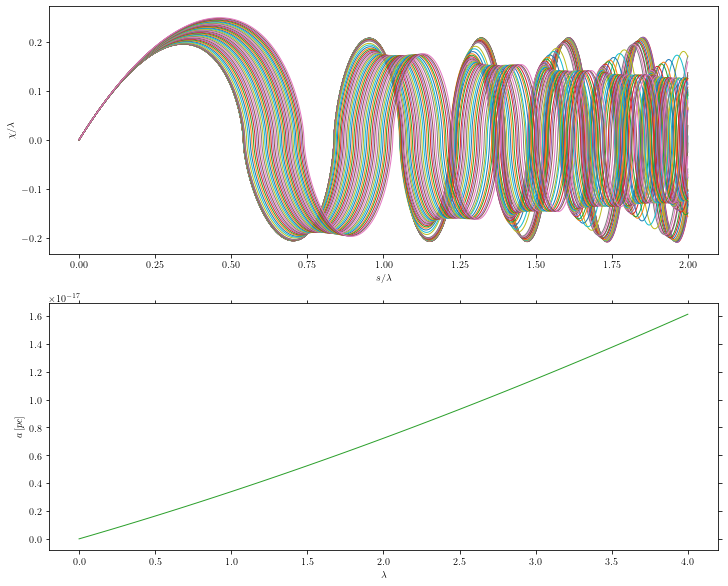

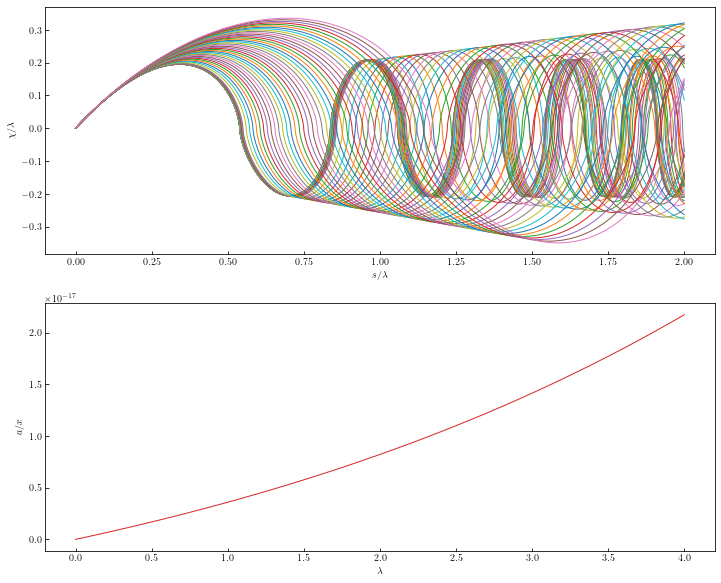

In [16]:
# Comparison of the values of the semi-major axis, a of the PBH binary decouple from 
# Hubble Expansion with and without DM halos using different values of λ.

fig, ax = plt.subplots(2,figsize=(12, 10)) 



plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)


plt.rc('lines', linewidth=1)




pc = 3.085e16              # in units of meter
C = 1/pc



#PBH binaries with DM halos.

def a_halo(λ_0):      #Function to calculate the initial semi-major axis of the PBH binary
    def f(u,s,λ_0): #Eq.(37) in "PBH-binary" notes.
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(λ_0,s)
                     *((u[0]**2+b**2)**(3/2))))]      
    separation0= [1e-12,1]
    b=(3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    ax[0].plot(As,Bs,'')
    ax[0].set(xlabel="$s/\lambda$", ylabel="$\chi/\lambda$")
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        A=Bs[i]
        semi=(((A/2)*λ_0))                   #As Bs=separations/λ_0.
        if Δ<0:
            x=(((3*(M_1PBH+M_2PBH)*λ_0)/(8*π*ρ_eq))**(1/3))    # The initial comoving separation of the PBH binary in units of meter.
            a=(semi)
            break
        
    
    return a





a_halo_list = np.zeros(len(λ_list))
for i, λ_0 in enumerate(λ_list):
     a_halo_list[i] = a_halo(λ_0)


ax[1].plot(λ_list,a_halo_list*C,'C2')
ax[1].set(xlabel="$\lambda$", ylabel="$a \,[pc]$")





#PBH binaries without DM halos.
fig, ax = plt.subplots(2,figsize=(12, 10))

def a_nohalo(λ_0):           #Function to calculate the initial semi-major axis of the PBH binary
    def f(u,s,λ_0):   #Eq.(16) in "PBH-binary" notes.
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0*((u[0]**2+b**2)**(3/2))))]   
    separation0= [1e-12,1]   
   
    b=(3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    ax[0].plot(As,Bs,'')
    ax[0].set(xlabel="$s/\lambda$", ylabel="$\chi/\lambda$")
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        A=Bs[i]
        semi=(((A/2)*λ_0))                   #As Bs=separations/λ_0.
        if Δ<0:
            x=(((3*(M_1PBH+M_2PBH)*λ_0)/(8*π*ρ_eq))**(1/3))    # The initial comoving separation of the PBH binary in units of meter.
            a=(semi)
            break
        
    
    return a





a_nohalo_list = np.zeros(len(λ_list))
for i, λ_0 in enumerate(λ_list):
     a_nohalo_list[i] = a_nohalo(λ_0)


ax[1].plot(λ_list, a_nohalo_list*C,'C3')
ax[1].set(xlabel="$\lambda$", ylabel="$a/x$")






# This graph also shows that for λ≈1 or λ>1, PBH binary having DM halos decouples earlier 
# than the same binary with no DM halos and hence is smaller in size comparatively7

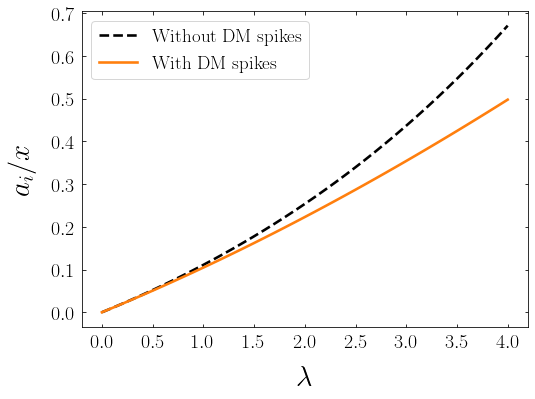

In [18]:
fig, ax = plt.subplots(1, figsize=(8, 5.8))

plt.rc('lines', linewidth = 2.6)

plt.tick_params(which='major', right=True, top=True)


ax.plot(λ_list, a_nohalo_list, 'k--')
ax.plot(λ_list, a_halo_list, 'C1') ##B2D732
plt.xlabel("$\lambda$", fontsize= 29, labelpad = 15)
plt.ylabel("$a_{i}/x$", fontsize= 29, labelpad = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

ax.tick_params(axis='x', pad= 6.8)
ax.tick_params(axis='y', pad= 6.8)

plt.legend(["Without DM spikes","With DM spikes"],prop = {'size': 19}, facecolor = 'white',
           loc='upper left', shadow = False,fontsize = 80) 
plt.savefig("semimajoraxisvslambda.pdf",bbox_inches="tight")
plt.show()